# CTR Dataset(Bunjang) Analysis

In [1]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
path = '/Users/bunjang/bun-analytics/NanumBarunpenR.otf'
fontprop = fm.FontProperties(fname=path, size=12)

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
parse_date = lambda val : pd.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv('bunjang_dataset.csv', parse_dates = ['updated'], date_parser = parse_date)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'viewer_uid', 'viewer_device', 'keyword', 'updated',
       'pid', 'ad_type', 'click', 'seller_uid', 'u_name', 'u_description',
       'u_favorite_count', 'u_comment_count', 'u_review_count', 'u_grade',
       'u_item_count', 'u_interest', 'u_bizlicense', 'u_following_cnt',
       'u_sex', 'u_age', 'u_married', 'u_birthdate', 'u_is_identification',
       'u_parcel_post_count', 'u_bunpay_count', 'u_transfer_count',
       'u_bunp_account_count', 'u_bunp_meet_count', 'p_updated', 'p_name',
       'p_keyword', 'p_price', 'p_taekpo', 'p_exchg', 'p_category_id', 'p_qty',
       'p_image_count', 'p_emergency_cnt', 'p_comment_cnt',
       'p_recent_comment_cnt', 'p_interest', 'p_recent_interest', 'p_pfavcnt',
       'p_recent_pavcnt', 'p_ptranscnt', 'p_recent_ptranscnt', 'p_is_adult'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,id,viewer_uid,viewer_device,keyword,updated,pid,ad_type,click,seller_uid,...,p_emergency_cnt,p_comment_cnt,p_recent_comment_cnt,p_interest,p_recent_interest,p_pfavcnt,p_recent_pavcnt,p_ptranscnt,p_recent_ptranscnt,p_is_adult
0,0,4900269841,7018899,i,프라다 모자,2019-11-19 12:00:00,111704526,super_up,0,9848111,...,0,0,0,500,0,30,0,0,0,0.0
1,76780,4900213421,3942133,i,NaN,2019-11-19 12:00:00,111683449,shop_up,0,5867159,...,0,0,0,78,0,3,0,0,0,0.0
2,76585,4900213421,3942133,i,NaN,2019-11-19 12:00:00,109559474,shop_up,0,5867159,...,0,0,0,1055,0,26,0,0,0,0.0
3,76450,4900213421,3942133,i,NaN,2019-11-19 12:00:00,96276268,shop_up,0,5867159,...,0,2,0,1201,0,16,0,0,0,0.0
4,662963,4900532229,6876926,a,NaN,2019-11-19 12:00:00,108903475,shop_up,0,3219341,...,0,1,0,272,0,21,0,0,0,0.0


In [11]:
df_scaled = df.copy()
num_cols = ['u_favorite_count', 'u_comment_count', 'u_review_count', 'u_item_count', 'u_interest', 'u_following_cnt', 'u_parcel_post_count', 'u_bunpay_count', 'u_transfer_count', 'u_bunp_account_count', 'u_bunp_meet_count', 'p_price', 'p_qty', 'p_image_count', 'p_emergency_cnt', 'p_comment_cnt', 'p_recent_comment_cnt', 'p_interest', 'p_pfavcnt', 'p_recent_pavcnt', 'p_ptranscnt', 'p_recent_ptranscnt']
features = df_scaled[num_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [12]:
df_scaled[num_cols] = features
df_scaled.head()

,Unnamed: 0,id,viewer_uid,viewer_device,keyword,updated,pid,ad_type,click,seller_uid,...,p_emergency_cnt,p_comment_cnt,p_recent_comment_cnt,p_interest,p_recent_interest,p_pfavcnt,p_recent_pavcnt,p_ptranscnt,p_recent_ptranscnt,p_is_adult
0,0,4900269841,7018899,i,프라다 모자,2019-11-19 12:00:00,111704526,super_up,0,9848111,...,-0.247093,-0.127540,-0.062522,-0.185734,0,-0.227570,-0.015503,-0.041425,-0.020477,0.0
1,76780,4900213421,3942133,i,NaN,2019-11-19 12:00:00,111683449,shop_up,0,5867159,...,-0.247093,-0.127540,-0.062522,-0.193134,0,-0.257301,-0.015503,-0.041425,-0.020477,0.0
2,76585,4900213421,3942133,i,NaN,2019-11-19 12:00:00,109559474,shop_up,0,5867159,...,-0.247093,-0.127540,-0.062522,-0.176002,0,-0.231975,-0.015503,-0.041425,-0.020477,0.0
3,76450,4900213421,3942133,i,NaN,2019-11-19 12:00:00,96276268,shop_up,0,5867159,...,-0.247093,-0.119382,-0.062522,-0.173442,0,-0.242986,-0.015503,-0.041425,-0.020477,0.0
4,662963,4900532229,6876926,a,NaN,2019-11-19 12:00:00,108903475,shop_up,0,3219341,...,-0.247093,-0.123461,-0.062522,-0.189732,0,-0.237480,-0.015503,-0.041425,-0.020477,0.0


The number of clicks in total
Total number : 6507932
Proportion of unclick : 0.9874588425324665
Proportion of click : 0.012541157467533466


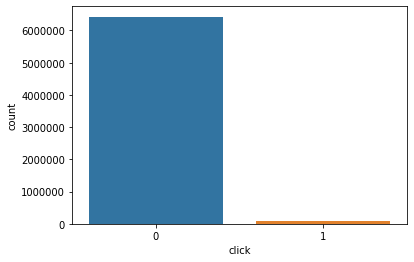

In [13]:
print('The number of clicks in total')
print('Total number :', len(df))
sns.countplot(x='click', data = df)
print('Proportion of unclick :', len(df[df['click'] == 0])/len(df))
print('Proportion of click :', len(df[df['click'] == 1])/len(df))

plt.savefig('big_clickcount.png')

57008

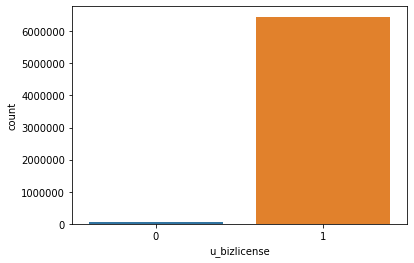

In [10]:
sns.countplot('u_bizlicense', data = df)
len(df[df['u_bizlicense'] == 0])

In [15]:
groupby_keyword = pd.DataFrame(df.groupby('keyword')['viewer_uid'].count()).sort_values(by = ['viewer_uid'], ascending = False)

In [16]:
groupby_keyword[:15]

,viewer_uid
keyword,
패딩,54507
롱패딩,50134
숏패딩,45086
에어팟,40251
아이폰,33604
아미키트,29527
아이폰8,23846
스톤아일랜드,22983
무스너클,22497


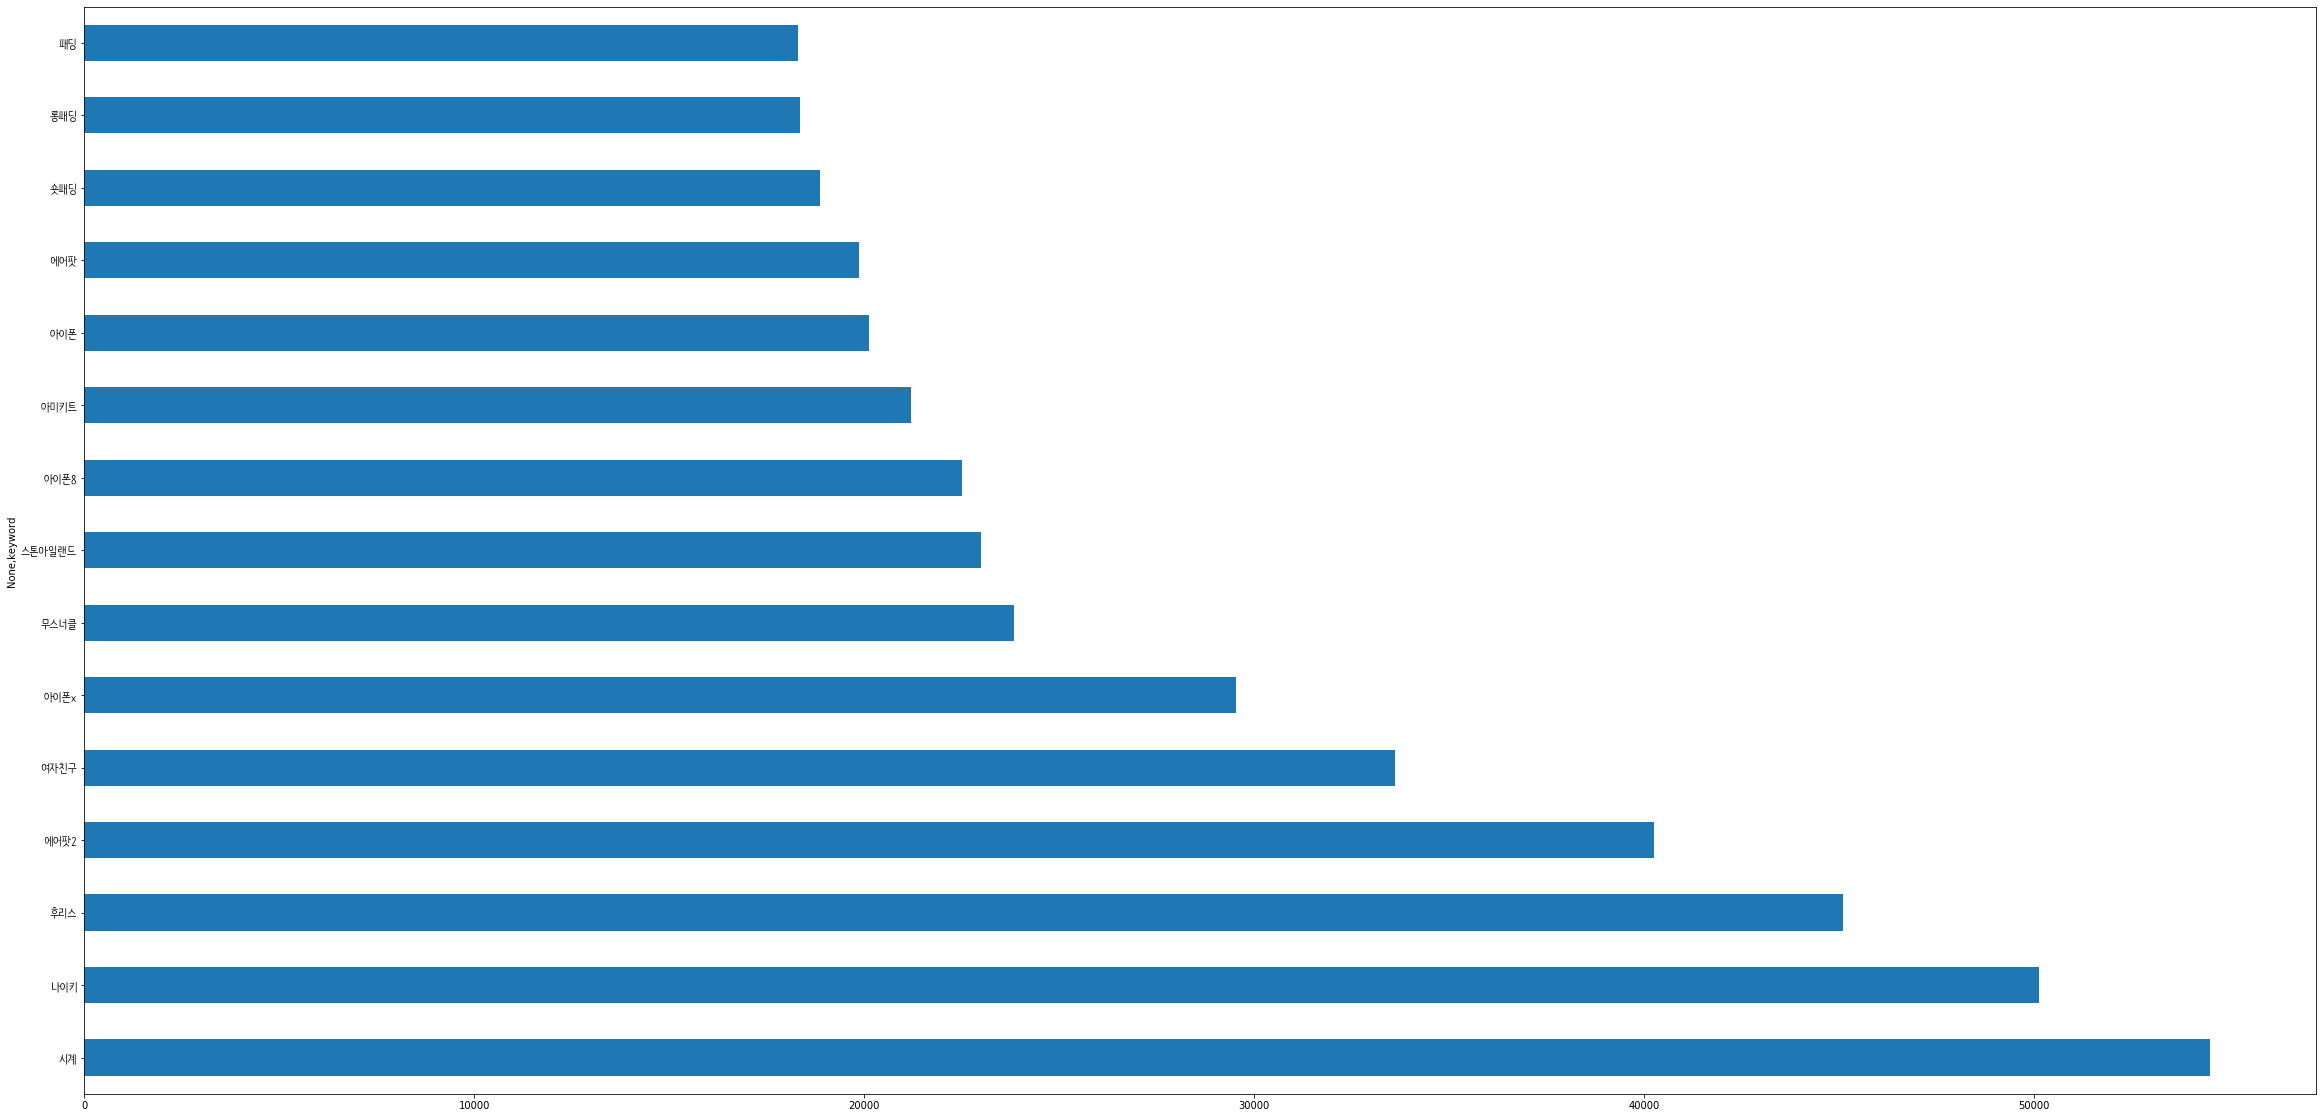

In [17]:
ax = groupby_keyword[:15].unstack().plot.barh(figsize=(40,20))
ax.set_yticklabels(['시계', '나이키', '후리스', '에어팟2', '여자친구', '아이폰x', '무스너클', '스톤아일랜드', '아이폰8', '아미키트', '아이폰', '에어팟', '숏패딩', '롱패딩', '패딩'], fontproperties=fontprop)
plt.savefig('big_top_keyword.png')

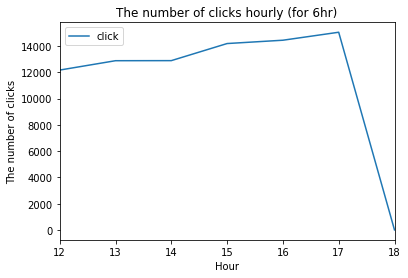

In [19]:
times = pd.DatetimeIndex(df['updated'])
df.groupby([times.hour]).agg({'click':'sum'}).plot()
plt.ylabel('The number of clicks')
plt.xlabel('Hour')
plt.title('The number of clicks hourly (for 6hr)')
plt.savefig('big_numberofClicks.png')

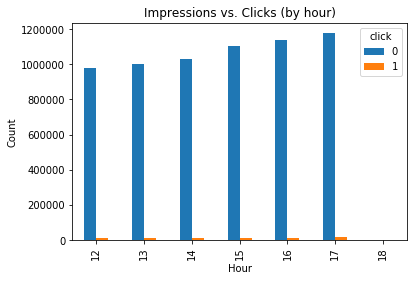

In [20]:
df.groupby([times.hour, 'click']).size().unstack().plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Impressions vs. Clicks (by hour)')
plt.savefig('big_UnclickVSclicks.png')

In [5]:
df_click = df[df['click'] == 1][['updated', 'click']].resample('H', on='updated').count()
df_hr = df[['updated', 'click']].resample('H', on='updated').count()
df_hr = df_hr.rename(columns = {'click':'impressions'})
df_hr['click_num'] = df_click['click']
df_hr['CTR'] = df_hr['click_num']/df_hr['impressions']
df_hr.head()

,updated,impressions,click_num,CTR
updated,,,,
2019-11-19 12:00:00,988269,988269,12169,0.012313
2019-11-19 13:00:00,1012979,1012979,12881,0.012716
2019-11-19 14:00:00,1043928,1043928,12887,0.012345
2019-11-19 15:00:00,1117418,1117418,14187,0.012696
2019-11-19 16:00:00,1152709,1152709,14440,0.012527


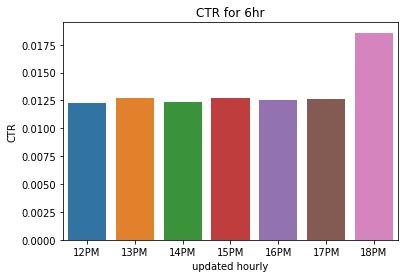

In [7]:
sns.barplot(y = 'CTR', x = df_hr.index, data = df_hr)
plt.xlabel('updated hourly')
plt.title('CTR for 6hr')
plt.savefig('big_ctr.png')
bars = ('12PM', '13PM', '14PM', '15PM', '16PM', '17PM', '18PM')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.savefig('./ctrbyhr.png')

In [23]:
# the number of viewer for each product
viewer_count = df.groupby('pid')['viewer_uid'].count().sort_values(ascending = False).reset_index().rename(columns = {'viewer_uid':'viewer_cnt'})
viewer_count['viewer_cnt'].describe()

count    21908.000000
mean       297.057331
std        637.135521
min          1.000000
25%         62.000000
50%        138.000000
75%        308.000000
max      14747.000000
Name: viewer_cnt, dtype: float64

max is 677.0


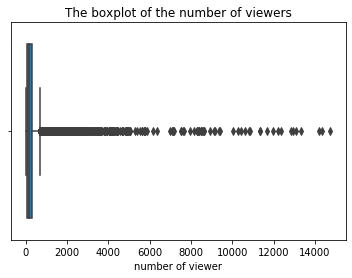

In [24]:
B = sns.boxplot('viewer_cnt', data = viewer_count)
plt.xlabel('number of viewer')
plt.title('The boxplot of the number of viewers')
## IQR  = Q3 - Q1
iqr = 308 - 62
## MAX = Q3 + 1.5 * IQR
max = 308 + 1.5 * iqr
print('max is',max)

In [26]:
top_pid = viewer_count[viewer_count['viewer_cnt'] > max]['pid'].tolist() # outliers
viewer_count[viewer_count['viewer_cnt'] > max] # outliers

,pid,viewer_cnt
0,109935315,14747
1,49056184,14332
2,111577831,14192
3,70126719,13344
4,111797763,13091
...,...,...
1950,108502294,679
1951,107948586,679
1952,111856527,679
1953,111281231,678


In [27]:
outlier_df = df[df['pid'] .isin(top_pid)]
outlier_df

,Unnamed: 0,id,viewer_uid,viewer_device,keyword,updated,pid,ad_type,click,seller_uid,...,p_emergency_cnt,p_comment_cnt,p_recent_comment_cnt,p_interest,p_recent_interest,p_pfavcnt,p_recent_pavcnt,p_ptranscnt,p_recent_ptranscnt,p_is_adult
22,20732,4900433409,1291983,a,NaN,2019-11-19 12:00:00,73376151,super_up,0,5507806,...,1,23,0,43305,0,1532,0,0,0,0.0
23,311111,4900269805,7436185,a,구찌 클러치백,2019-11-19 12:00:00,111377152,super_up,0,9962822,...,0,2,0,223,0,1,0,0,0,0.0
24,1132138,4900532217,4488466,i,에어팟,2019-11-19 12:00:00,109739101,super_up,0,3486692,...,0,5,0,1093,0,53,0,0,0,0.0
52,419811,4900366105,10284235,i,알렉산더맥퀸,2019-11-19 12:00:00,108896347,power_up,0,4562617,...,1,2,0,12800,0,537,0,0,0,0.0
55,331617,4900269805,7436185,a,구찌 클러치백,2019-11-19 12:00:00,111389708,super_up,0,251071,...,0,3,0,827,0,34,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507923,1958202,4908654325,7578150,i,인사일런스 숏패딩,2019-11-19 18:00:00,70126719,super_up,0,5202503,...,28,81,0,237070,0,1402,0,0,0,0.0
6507926,1958306,4908963293,1645155,i,NaN,2019-11-19 18:00:00,70126719,super_up,0,5202503,...,28,81,0,237070,0,1402,0,0,0,0.0
6507927,1958307,4908963293,1645155,i,NaN,2019-11-19 18:00:00,70126719,super_up,0,5202503,...,28,81,0,237070,0,1402,0,0,0,0.0
6507930,730493,4908654317,7880381,i,NaN,2019-11-19 18:00:00,103904311,power_up,0,5426120,...,8,17,0,8874,0,47,0,0,0,0.0


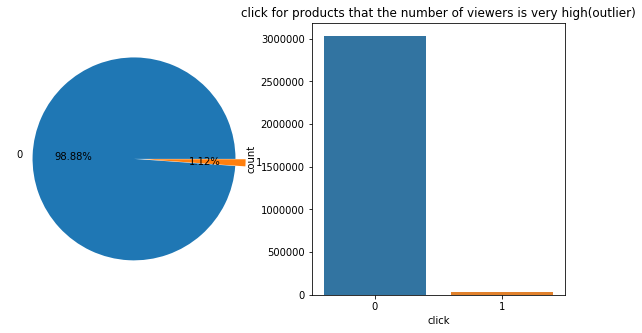

In [33]:
f,ax=plt.subplots(1,2,figsize=(10,5))

outlier_df['click'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_ylabel('')

sns.countplot('click',data=outlier_df,ax=ax[1])
plt.title('click for products that the number of viewers is very high(outlier)')

plt.savefig('big_out_click_prop.png')

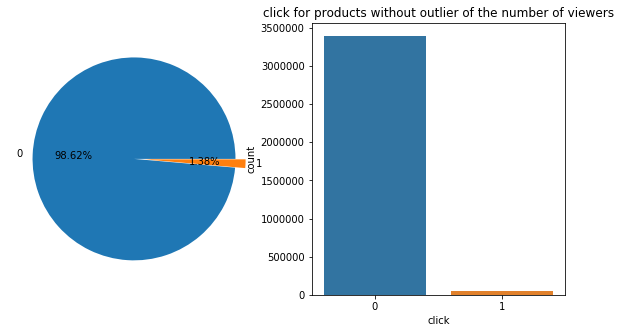

In [34]:
not_outlier_df = df[~df['pid'].isin(top_pid)]

f,ax=plt.subplots(1,2,figsize=(10,5))

not_outlier_df['click'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_ylabel('')

sns.countplot('click',data=not_outlier_df,ax=ax[1])
plt.title('click for products without outlier of the number of viewers')

plt.savefig('big_nonout_click_prop.png')

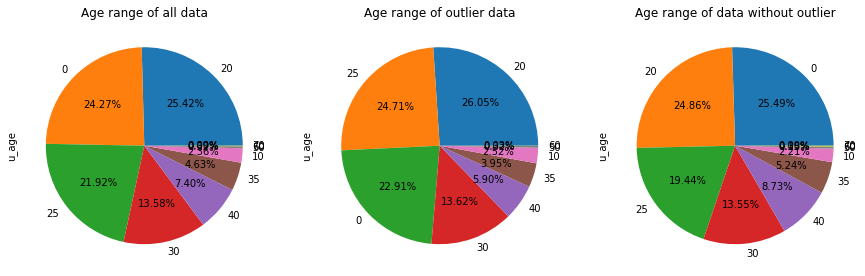

In [35]:
f,ax=plt.subplots(1,3,figsize=(15,5))

df['u_age'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Age range of all data')
outlier_df['u_age'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1])
ax[1].set_title('Age range of outlier data')
not_outlier_df['u_age'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[2])
ax[2].set_title('Age range of data without outlier')

plt.savefig('big_age_prop.png')

In [25]:
# plt.hist(df[df['u_favorite_count']])
df['p_interest'].describe()

count    6.507932e+06
mean     1.109229e+04
std      5.702926e+04
min      0.000000e+00
25%      3.620000e+02
50%      1.225000e+03
75%      5.309000e+03
max      3.022743e+06
Name: p_interest, dtype: float64

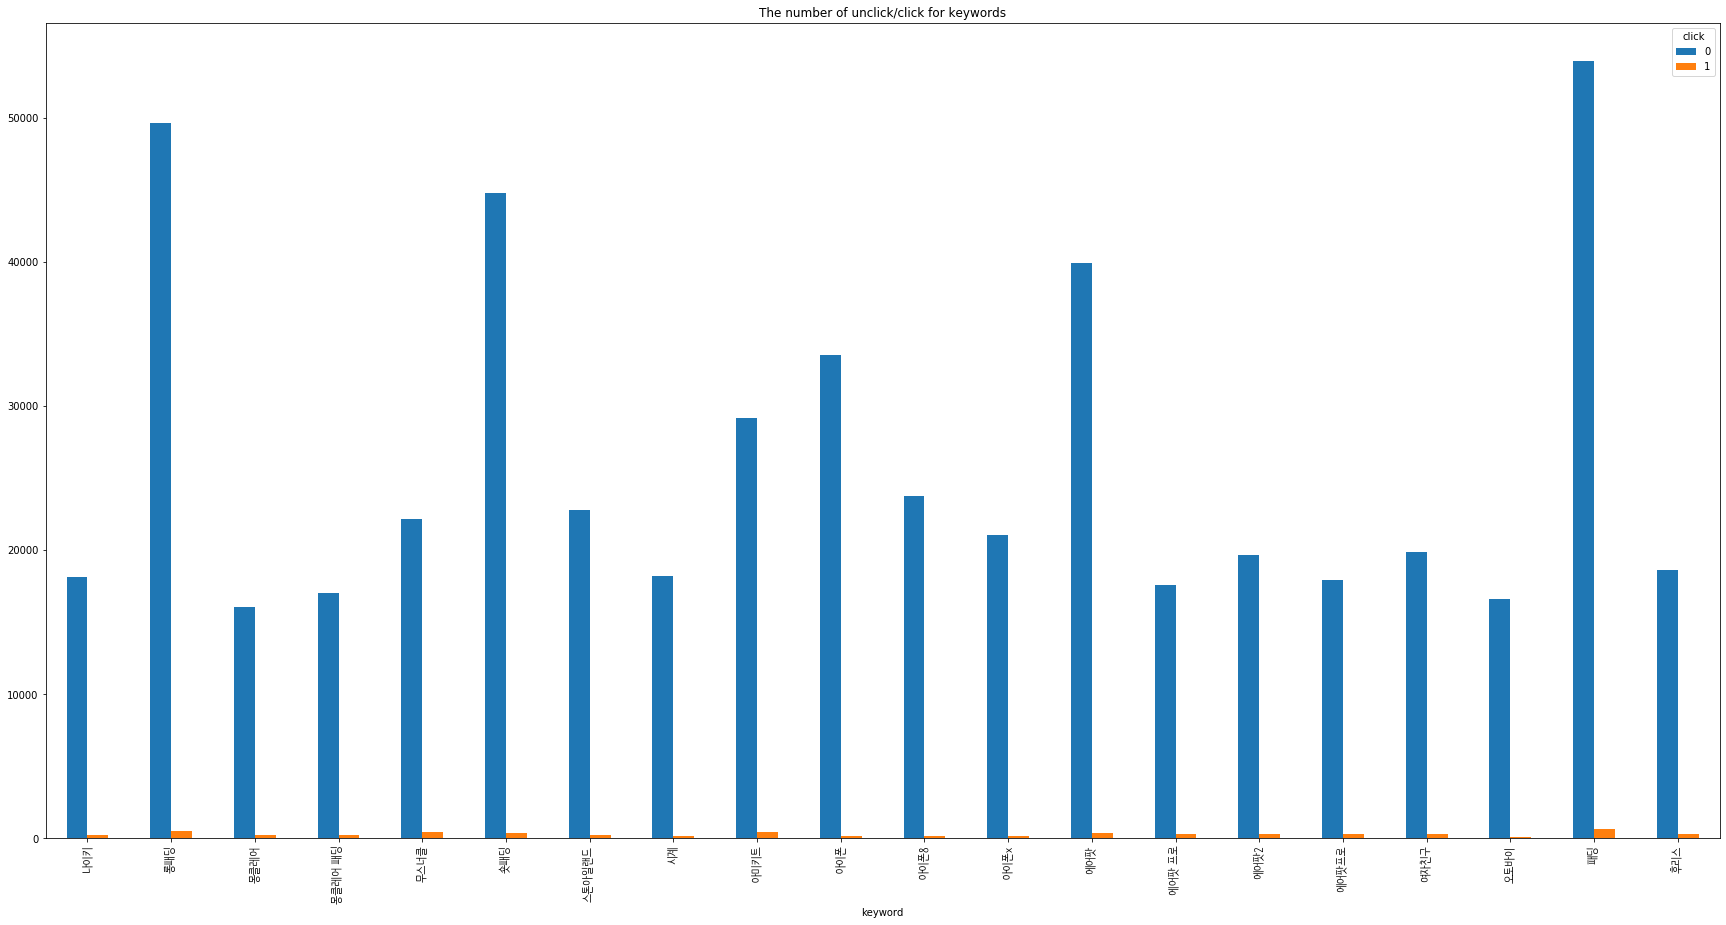

In [43]:
top_keyword = df.groupby('keyword')['id'].count().reset_index().sort_values('id', ascending = False)[:20]['keyword'].tolist()
# df[df['keyword'].isin(top_keyword)].groupby(['keyword', 'click']).size().reset_index()
ax = df[df['keyword'].isin(top_keyword)].groupby(['keyword', 'click']).size().unstack().plot(kind = 'bar', figsize = (30,15))
ax.set_xticklabels(['나이키', '롱패딩', '몽클레어', '몽클레어 패딩', '무스너클', '숏패딩', '스톤아일랜드', '시계', '아미키트', '아이폰', '아이폰8', '아이폰x', '에어팟', '에어팟 프로', '에어팟2', '에어팟프로', '여자친구', '오토바이', '패딩', '후리스'], fontproperties=fontprop)
plt.title('The number of unclick/click for keywords')
plt.savefig('big_top_keyword_count.png')

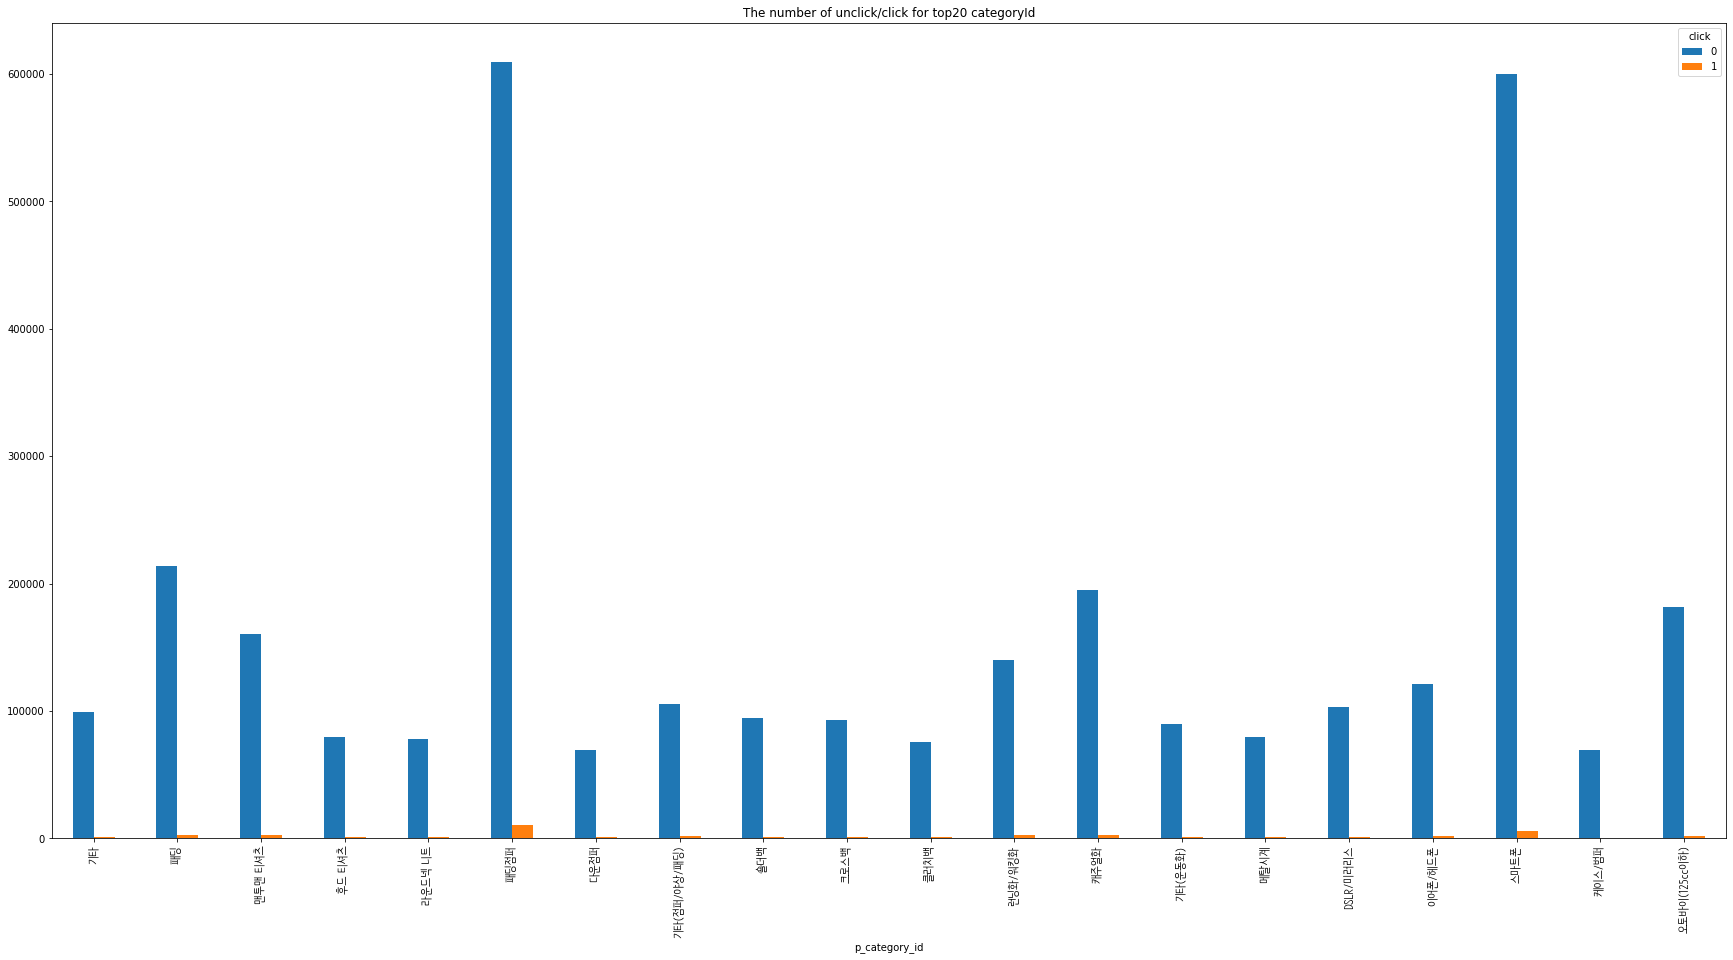

In [44]:
top_category = df.groupby('p_category_id')['id'].count().reset_index().sort_values('id', ascending = False)[:20]['p_category_id']
ax = df[df['p_category_id'].isin(top_category)].groupby(['p_category_id', 'click']).size().unstack().plot(kind = 'bar', figsize = (30, 15))
ax.set_xticklabels(['기타', '패딩', '맨투맨 티셔츠', '후드 티셔츠', '라운드넥 니트', '패딩점퍼', '다운점퍼', '기타(점퍼/야상/패딩)', '숄더백', '크로스백', '클러치백', '런닝화/워킹화', '캐주얼화', '기타(운동화)', '메탈시계', 'DSLR/미러리스', '이어폰/헤드폰', '스마트폰', '케이스/범퍼', '오토바이(125cc이하)'], fontproperties = fontprop)
plt.title('The number of unclick/click for top20 categoryId')
plt.savefig('big_top_categoryid.png')

In [45]:
first_category = list()
for id in df['p_category_id'].tolist():
    first_category.append(str(id)[:3])
df['p_1st_category'] = first_category

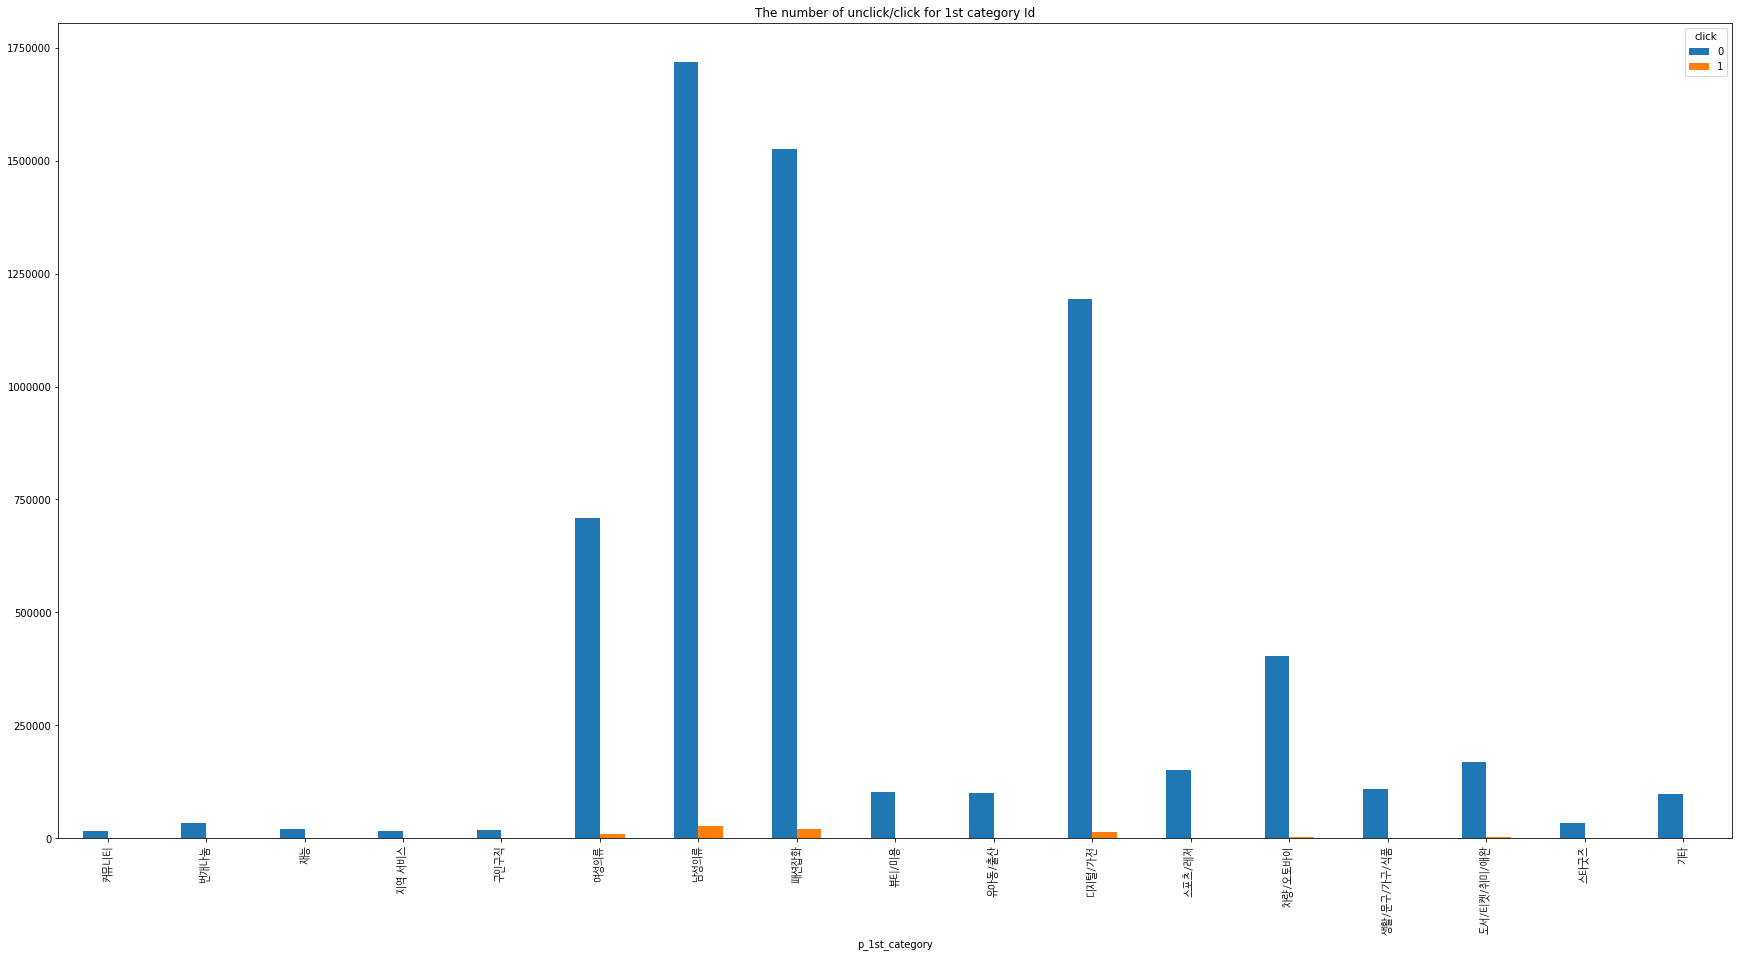

In [47]:
ax = df.groupby(['p_1st_category', 'click']).size().unstack().plot(kind = 'bar', figsize = (30, 15))
plt.title('The number of unclick/click for 1st category Id')
ax.set_xticklabels(['커뮤니티', '번개나눔', '재능', '지역 서비스', '구인구직', '여성의류', '남성의류', '패션잡화', '뷰티/미용', '유아동/출산', '디지털/가전', '스포츠/레저', '차량/오토바이', '생활/문구/가구/식품', '도서/티켓/취미/애완', '스타굿즈', '기타'], fontproperties = fontprop)
plt.savefig('big_1stCategory.png')

In [48]:
second_category = list()
for id in df['p_category_id'].tolist():
    second_category.append(str(id)[:6])
df['p_2nd_category'] = second_category

In [49]:
categories = df.groupby(['p_1st_category', 'p_2nd_category', 'click']).size()
categories.head()

p_1st_category  p_2nd_category  click
100             100800          0        16771
                                1            7
200             200100          0        18315
                                1          141
                200200          0          522
dtype: int64

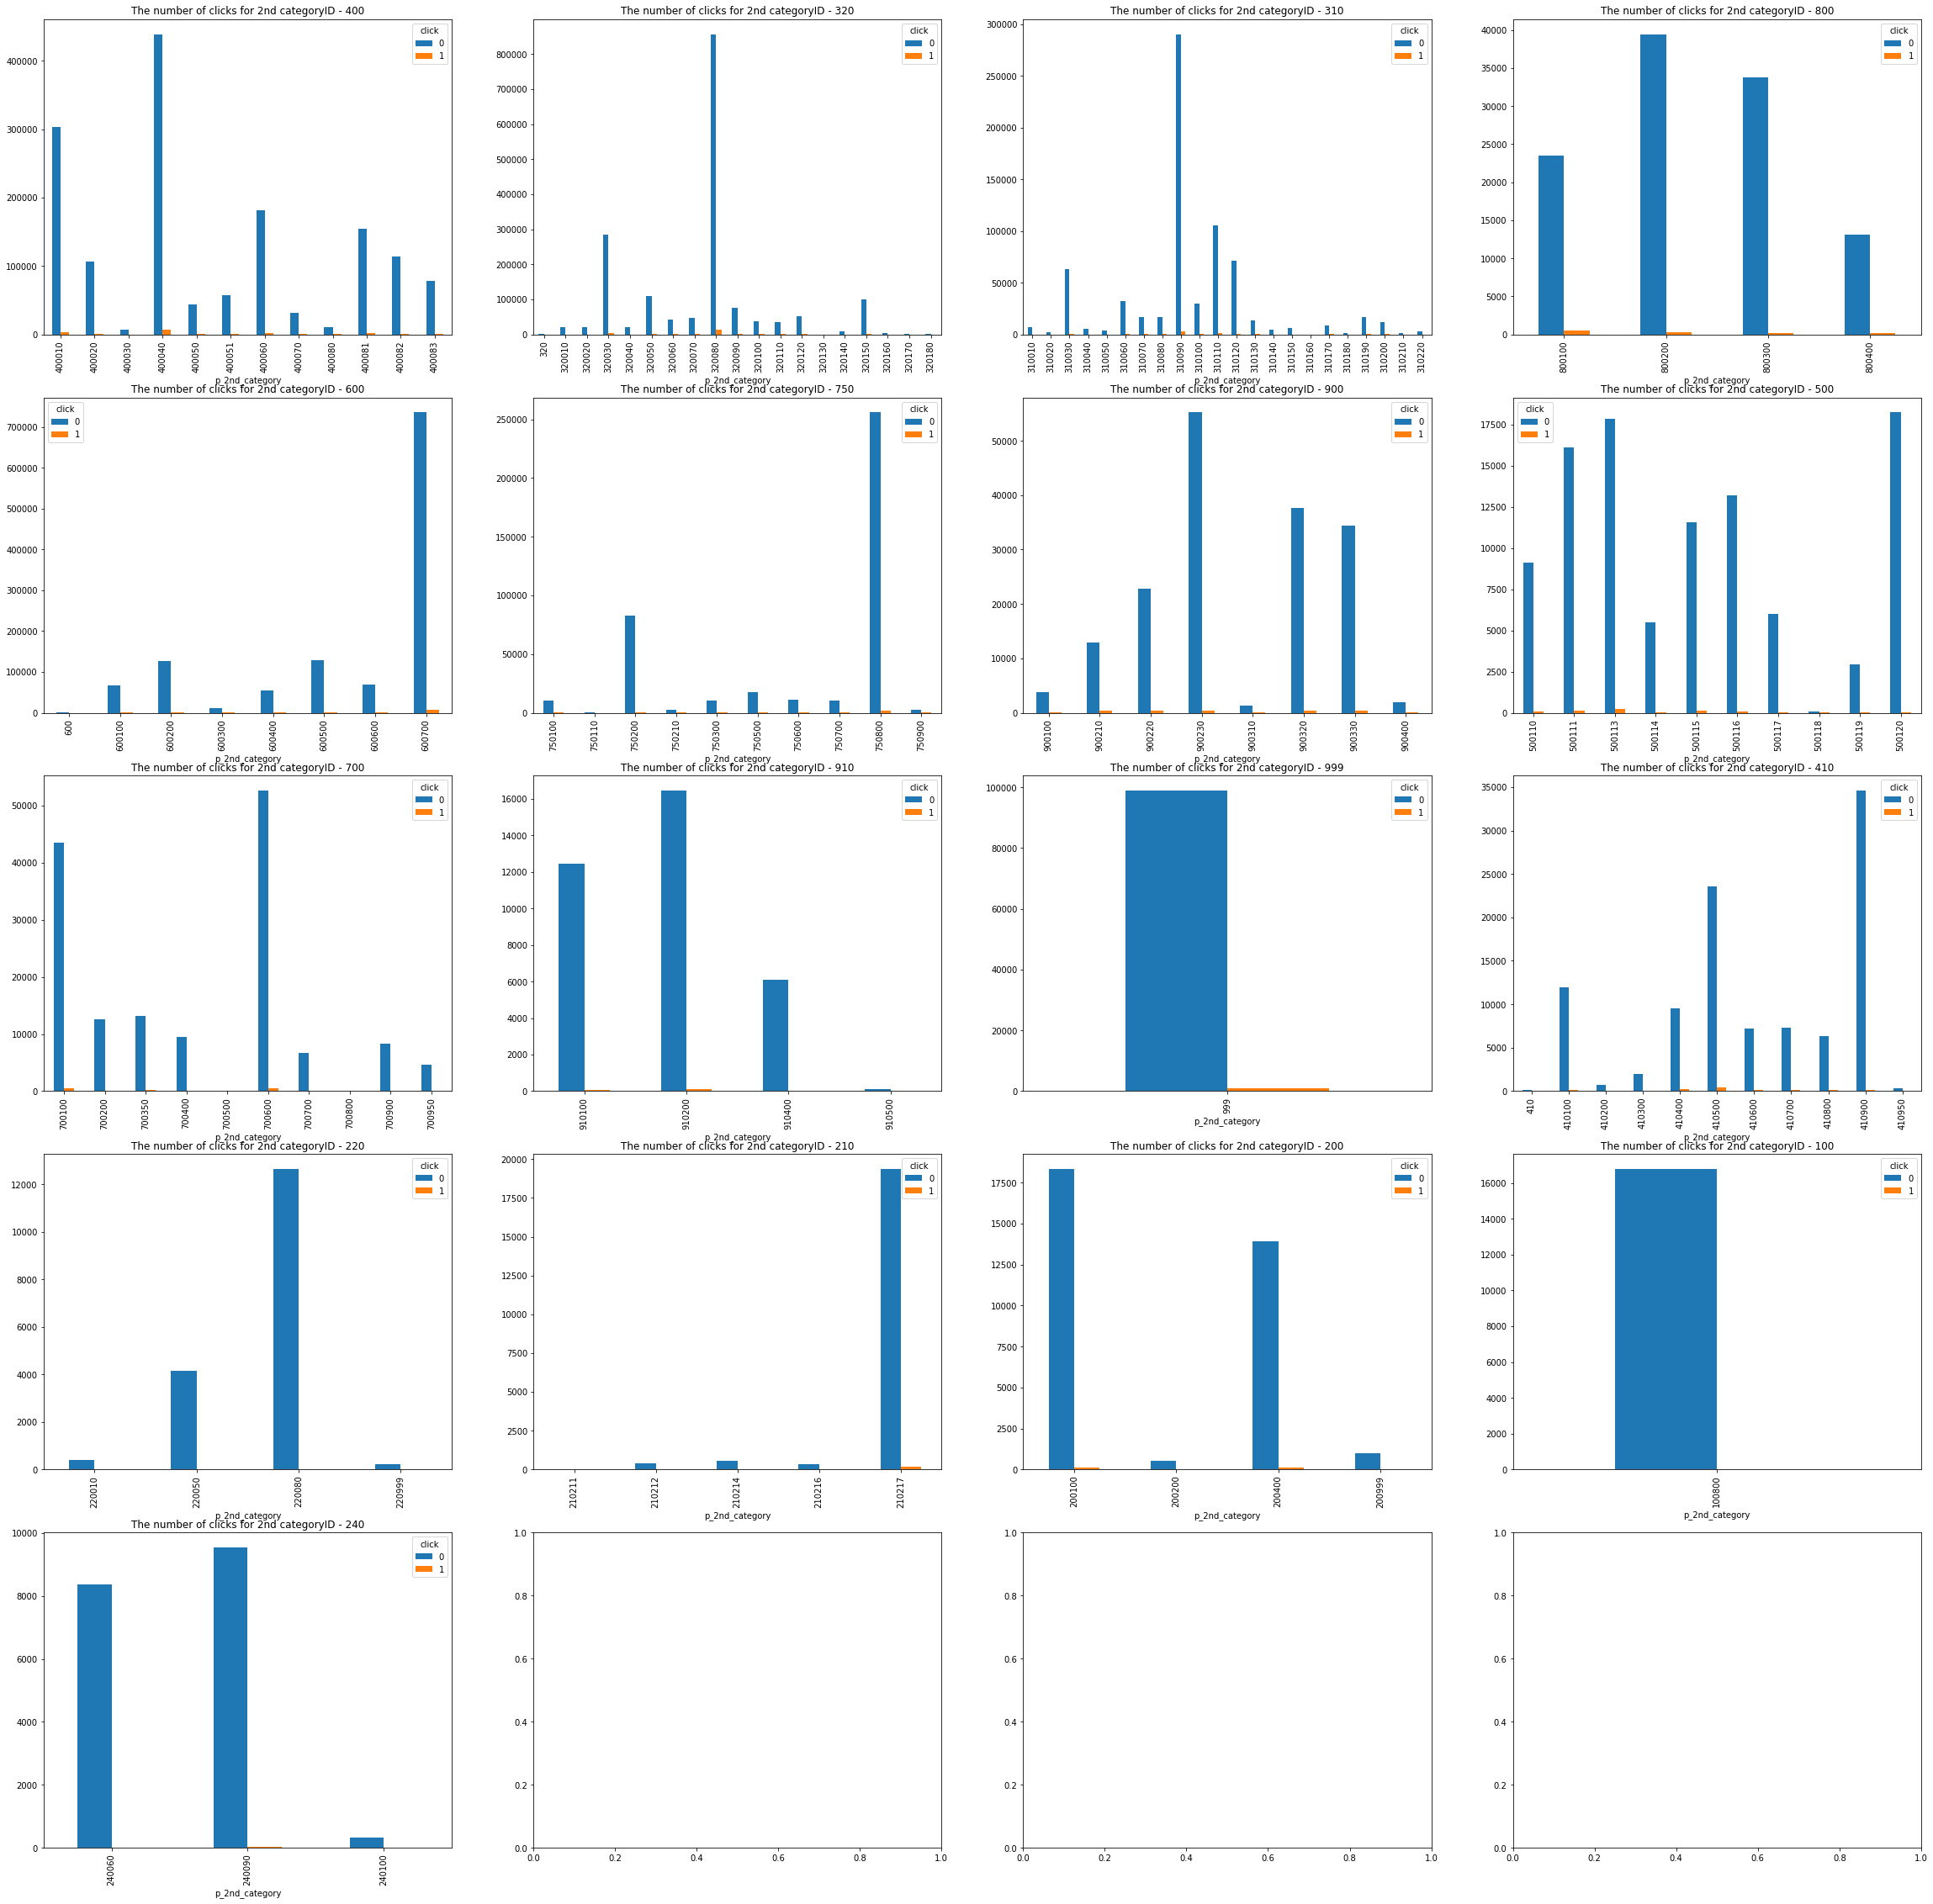

In [52]:
f, axes = plt.subplots(5, 4, figsize = (40, 40))
row = 0
col = 0
parent_categories = df['p_1st_category'].unique()
for c in parent_categories:
    categories.get(c).unstack().plot(kind = 'bar', ax = axes[row, col])
    axes[row,col].set_title('The number of clicks for 2nd categoryID - '+ c)
    col += 1
    if col == 4:
        row += 1
        col = 0
plt.savefig('big_2ndcategory_for1st.png')

In [54]:
age_group = df.groupby(['u_age'])

In [55]:
age_group.groups

{0: Int64Index([      0,      11,      22,      25,      26,      28,      29,
                  30,      52,      86,
             ...
             6507884, 6507885, 6507890, 6507898, 6507900, 6507903, 6507908,
             6507909, 6507913, 6507930],
            dtype='int64', length=1579606),
 10: Int64Index([     35,      36,      71,     214,     375,     395,     472,
                 473,     480,     593,
             ...
             6507901, 6507902, 6507914, 6507915, 6507916, 6507918, 6507919,
             6507920, 6507924, 6507925],
            dtype='int64', length=153331),
 20: Int64Index([      4,       6,      12,      14,      33,      34,      40,
                  42,      44,      45,
             ...
             6507860, 6507864, 6507871, 6507875, 6507892, 6507896, 6507897,
             6507917, 6507928, 6507931],
            dtype='int64', length=1654475),
 25: Int64Index([      1,       2,       3,       5,       8,       9,      10,
                  13,      1

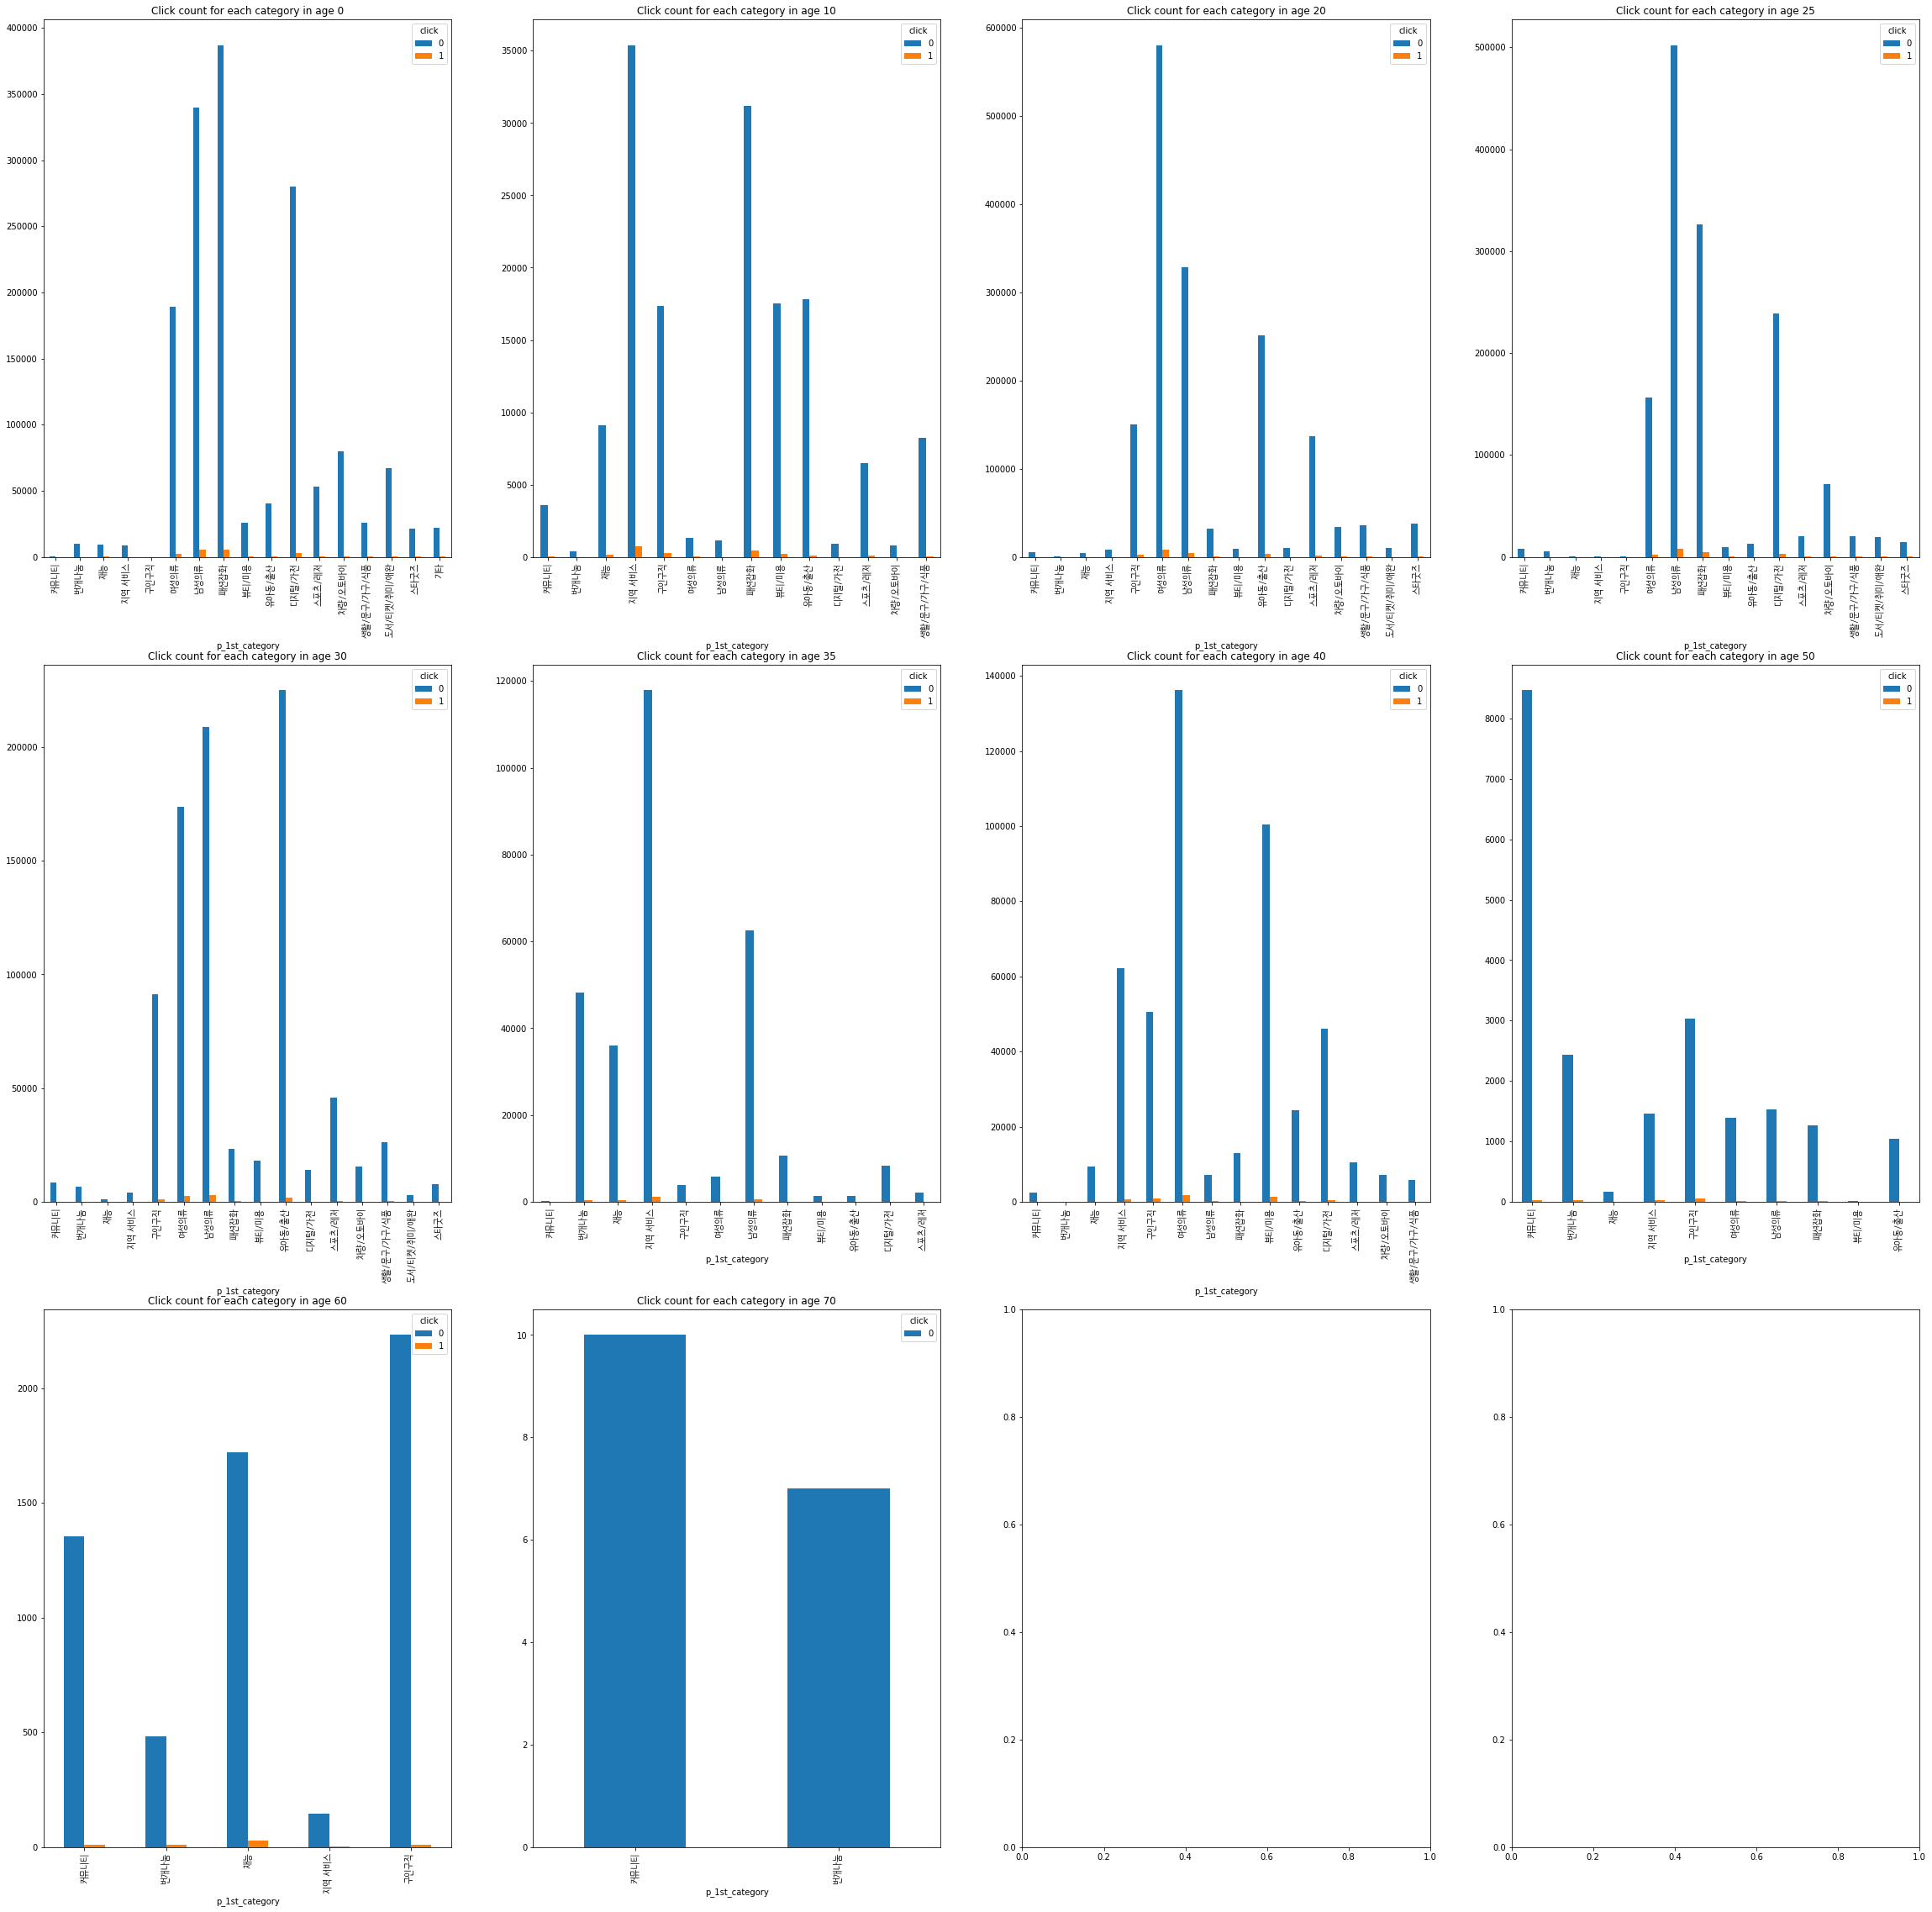

In [56]:
f, axes = plt.subplots(3, 4, figsize = (40, 40))
row = 0
col = 0
for age, group in age_group:
    category_group = group.groupby(['p_1st_category', 'click']).size().unstack().plot(kind = 'bar', ax = axes[row, col])
    axes[row, col].set_title('Click count for each category in age ' + str(age))
    axes[row, col].set_xticklabels(['커뮤니티', '번개나눔', '재능', '지역 서비스', '구인구직', '여성의류', '남성의류', '패션잡화', '뷰티/미용', '유아동/출산', '디지털/가전', '스포츠/레저', '차량/오토바이', '생활/문구/가구/식품', '도서/티켓/취미/애완', '스타굿즈', '기타'], fontproperties = fontprop)
    col += 1
    if col == 4:
        row += 1
        col = 0

plt.savefig('big_1stcategory_byage.png')

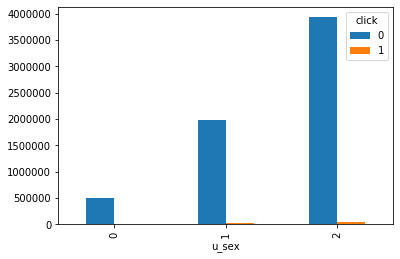

In [57]:
groupby_sex = df.groupby(['u_sex', 'click']).size().unstack().plot(kind = 'bar')
plt.savefig('big_clickByAge.png')

SEX - 0: 기본값, 1: 여자, 2: 남자


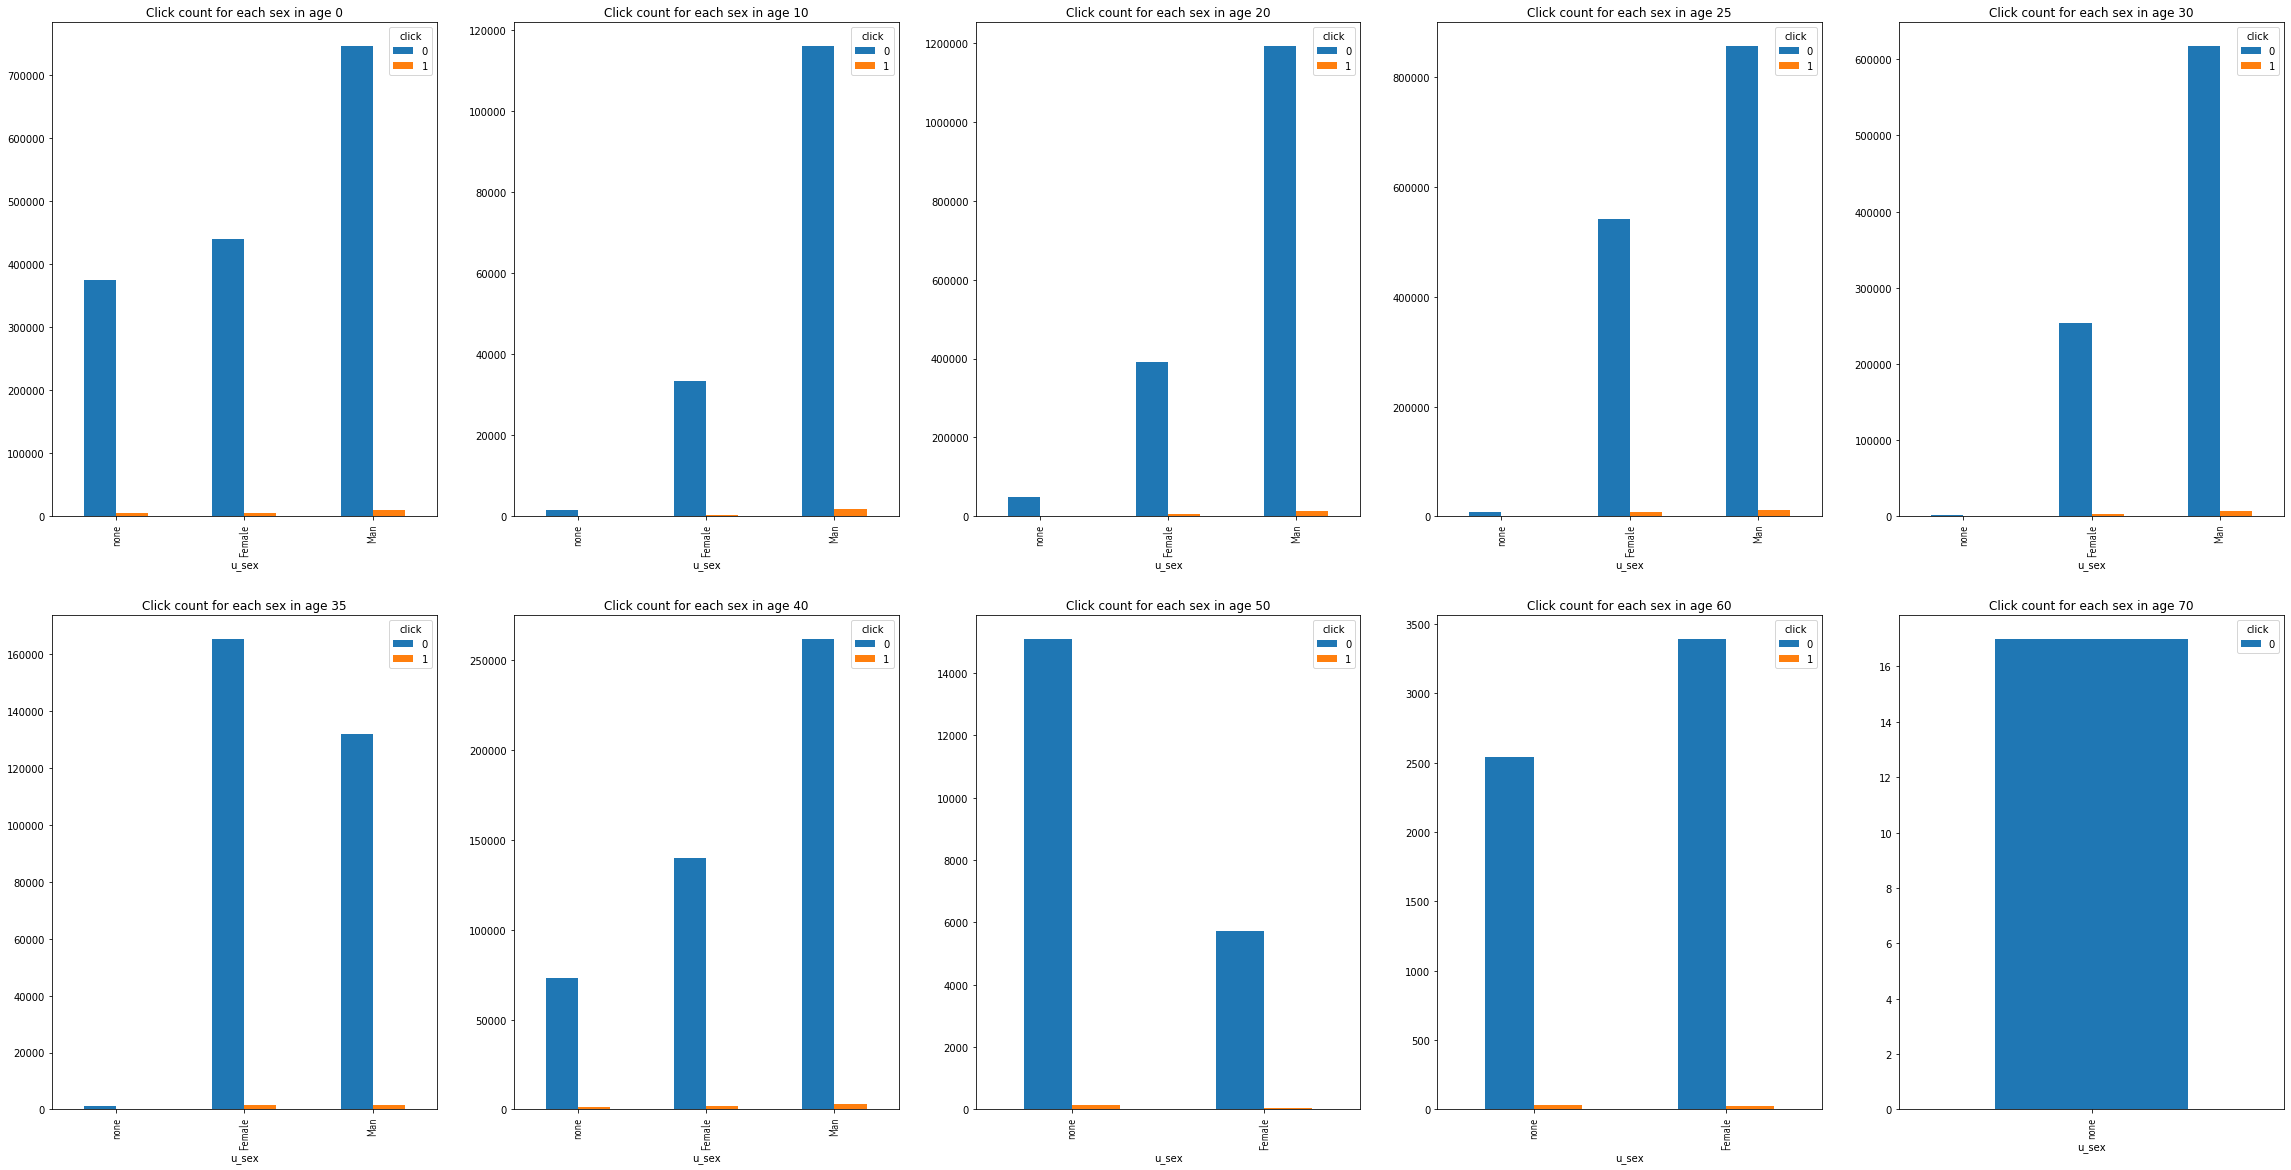

In [64]:
print('SEX - 0: 기본값, 1: 여자, 2: 남자')
f, axes = plt.subplots(2, 5, figsize = (40,20))
row = 0
col = 0
for age, group in age_group:
    group.groupby(['u_sex', 'click']).size().unstack().plot(kind = 'bar', ax = axes[row, col])
    axes[row, col].set_xticklabels(['none', 'Female', 'Man'], fontproperties = fontprop)
    axes[row, col].set_title('Click count for each sex in age ' + str(age))
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.savefig('big_click_byAgeandSex.png')

Text(0.5, 1.0, 'The number of clicks by gender over time')

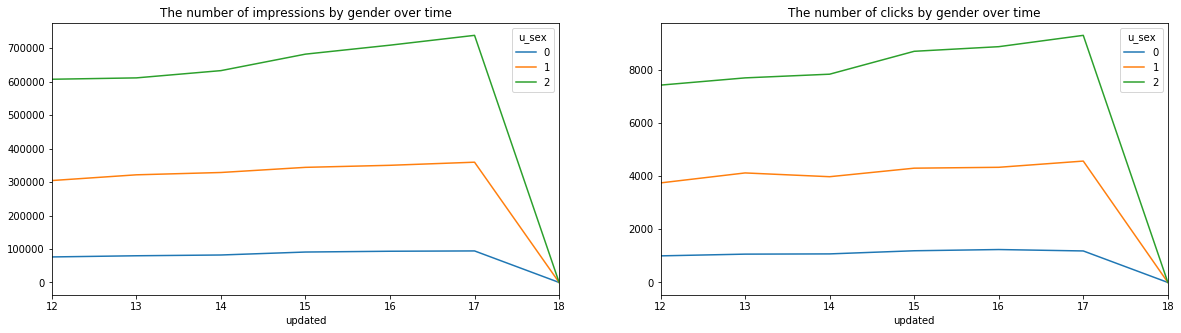

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,5))
df.groupby([times.hour, 'u_sex'])['id'].count().unstack().plot(ax = ax[0])
ax[0].set_title('The number of impressions by gender over time')

df.groupby([times.hour, 'u_sex'])['click'].sum().unstack().plot(ax = ax[1])
ax[1].set_title('The number of clicks by gender over time')

In [57]:
print('proportion of female clicks :', df[(df['click'] == 1) & (df['u_sex'] == 1)]['id'].count()/df[df['u_sex'] == 1]['id'].count(), 
'proportion of male clicks :', df[(df['click'] == 1) & (df['u_sex'] == 2)]['id'].count()/df[df['u_sex'] == 2]['id'].count())

proportion of female clicks : 0.012466634342259714 proportion of male clicks : 0.012509563588984252


count    8.161700e+04
mean     1.514659e+06
std      3.171325e+07
min      0.000000e+00
25%      4.000000e+04
50%      9.500000e+04
75%      2.300000e+05
max      1.000000e+09
Name: p_price, dtype: float64

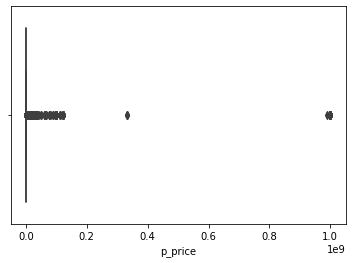

In [58]:
sns.boxplot('p_price', data = df[df['click'] == 1])
df[df['click'] == 1]['p_price'].describe()

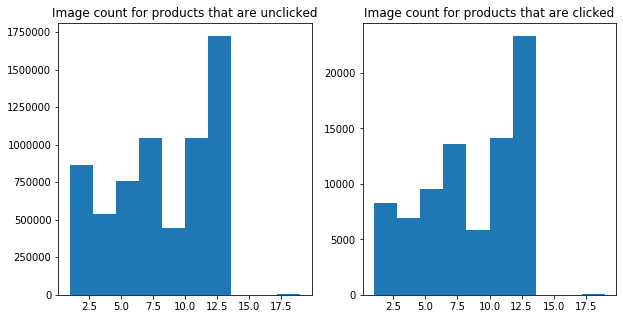

In [65]:
f,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].hist(df[df['click'] == 0]['p_image_count'])
ax[0].set_title('Image count for products that are unclicked')

ax[1].hist(df[df['click'] == 1]['p_image_count'])
ax[1].set_title('Image count for products that are clicked')

plt.savefig('big_imgcnt.png')

In [65]:
# df['u_birthdate'].unique()
# the proportion of u_birthdate == NaN 
str(len(df[df['u_birthdate'].isna()])/len(df)*100) + '%'

'9.836181447501295%'

In [72]:
df.sort_values('p_emergency_cnt', ascending = False)[:20]

,Unnamed: 0,id,viewer_uid,viewer_device,keyword,updated,pid,ad_type,click,seller_uid,...,p_recent_comment_cnt,p_interest,p_recent_interest,p_pfavcnt,p_recent_pavcnt,p_ptranscnt,p_recent_ptranscnt,p_is_adult,p_1st_category,p_2nd_category
4443455,118159,4905574053,4648390,i,에어팟,2019-11-19 16:15:16,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
6308444,118538,4908131885,2979341,i,여드름,2019-11-19 17:49:31,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
3430731,117962,4904032349,4184074,a,패딩,2019-11-19 15:20:27,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
6308445,118539,4908187165,5652091,a,에어팟,2019-11-19 17:49:31,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
539218,117320,4901150633,7085175,a,아이팟,2019-11-19 12:33:02,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
5655960,118411,4906821313,7748453,a,제이엠,2019-11-19 17:17:16,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
3239643,117910,4904442681,239829,w,에어팟,2019-11-19 15:10:48,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
1597027,117549,4902393285,1021995,i,에어팟,2019-11-19 13:35:21,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
6024576,118470,4907869633,6957437,a,에어팟,2019-11-19 17:34:59,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100
376591,117285,4900529489,8948668,w,아이폰,2019-11-19 12:23:15,31537985,super_up,0,2617066,...,2670,3022743,0,35211,104,0,31,0.0,410,410100


In [67]:
emergency_group = df.groupby(['p_emergency_cnt', 'pid', 'p_1st_category', 'click'])['id'].count().reset_index()

In [69]:
df['p_emergency_cnt'].unique()

array([  0,   1,   2,   3,   6,   5,  17,  13,   4,  11,  10,  21,   7,
        16, 139,  19,   9,   8,  28,  14,  15,  25,  73,  18,  12,  20,
        45,  40,  31,  23,  52,  90,  32,  49,  36,  38,  50,  22,  39])

In [74]:
emergency_group = emergency_group.rename(columns = {'id':'count'})
emergency_group[emergency_group['p_emergency_cnt'] > 3].groupby(['p_emergency_cnt', 'p_1st_category', 'click'])['count'].sum().reset_index()[:]

,p_emergency_cnt,p_1st_category,click,count
0,4,200,0,203
1,4,200,1,5
2,4,310,0,1314
3,4,310,1,14
4,4,320,0,11778
...,...,...,...,...
213,73,400,1,62
214,90,410,0,1135
215,90,410,1,24
216,139,410,0,1349


In [75]:
df['ad_type'].unique()

array(['super_up', 'shop_up', 'power_up'], dtype=object)

In [ ]:
f, ax = plt.subplots(1,3 , figsize = (10, 5))

df.groupby(['ad_type', 'click'])['id'].count().unstack().plot(kind = 'bar', ax = ax[0])
df['ad_type'].value_counts().plot.pie(autopct='%1.2f%%', ax = ax[1])
# plt.savefig('big_adtype.png')
df.groupby(['ad_type', 'click'])['id'].value_counts().plot.pie(autopct='%1.2f%%', ax = ax[2])
